In [ ]:
import os 
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt 


In [ ]:
load_dotenv()

DATA_PATH = os.getenv('FIGARO_DATA_PATH')
data = os.path.join(DATA_PATH, 'results/Greenhouse gas/Greenhouse gas_footprint.xlsx')


In [8]:
ghg_df = pd.read_excel(data, sheet_name='WORLD')
ghg_df = ghg_df.drop(columns=['Unnamed: 0'])
ghg_df = ghg_df.convert_dtypes()
print(ghg_df.shape)
print(ghg_df.columns.to_list())

(392, 15)
['Ecosystem', 'country', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']


In [26]:
df_long = ghg_df.melt(
    id_vars=['Ecosystem', 'country'],
    value_vars=[str(year) for year in range(2016, 2023)],
    var_name='Year',
    value_name='Emissions'
)

df_long['Year'] = df_long['Year'].astype(int)

df_long['Emissions'] = pd.to_numeric(df_long['Emissions'], errors='coerce')

df_eu = df_long[df_long['country'] == 'EU27_2020'].copy()
print(df_eu.shape)
df_eu.head

(98, 4)


<bound method NDFrame.head of                               Ecosystem    country  Year     Emissions
10                  Aerospace & Defence  EU27_2020  2016   18951.37499
38                            Agri-food  EU27_2020  2016    761268.345
66                         Construction  EU27_2020  2016     54616.323
94     Cultural and Creative Industries  EU27_2020  2016  11722.505712
122                             Digital  EU27_2020  2016    7469.19296
...                                 ...        ...   ...           ...
2614  Mobility - Transport - Automotive  EU27_2020  2022  186052.38554
2642         Proximity & Social Economy  EU27_2020  2022   22004.71268
2670                             Retail  EU27_2020  2022     77960.869
2698                            Textile  EU27_2020  2022     16839.075
2726                            Tourism  EU27_2020  2022  215343.78145

[98 rows x 4 columns]>

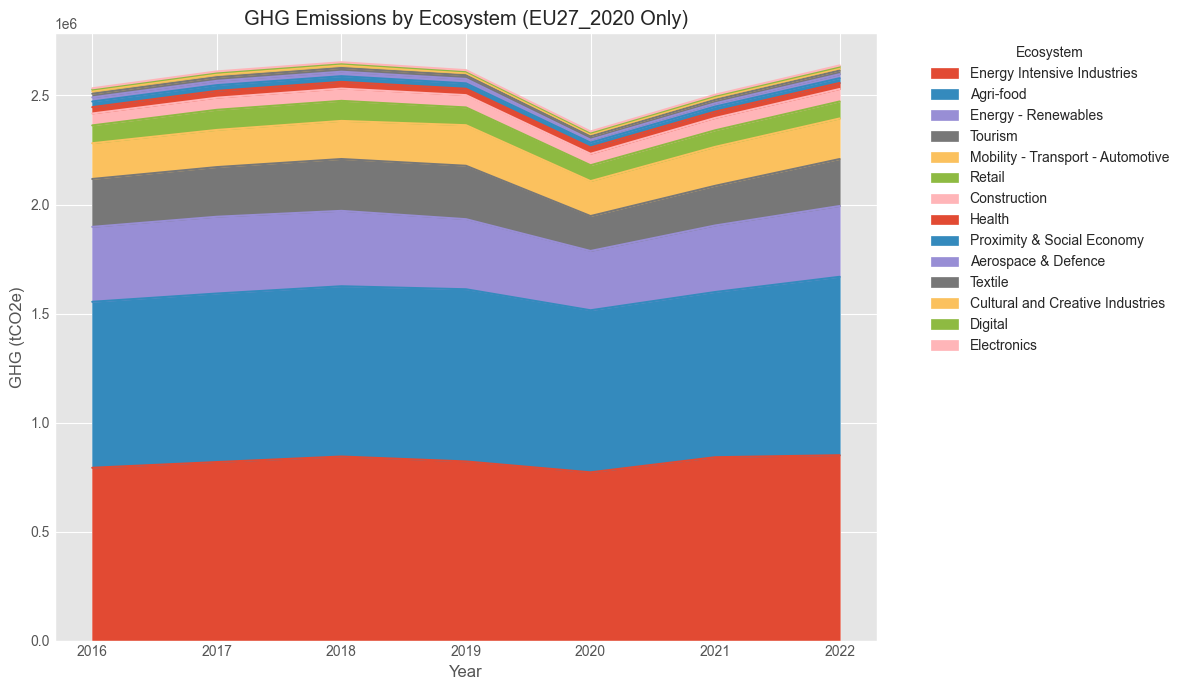

In [25]:
ecosystem_totals = df_eu.groupby('Ecosystem')['Emissions'].sum()
ecosystem_order = ecosystem_totals.sort_values(ascending=False).index.tolist()


df_pivot_eu = df_eu.pivot_table(
    index='Year',
    columns='Ecosystem',
    values='Emissions',
    aggfunc='sum'
)


df_pivot_eu = df_pivot_eu[ecosystem_order]

plt.style.use('ggplot') 

df_pivot_eu.plot(
    kind='area',
    stacked=True,
    figsize=(12, 7),
    title='GHG Emissions by Ecosystem (EU27_2020 Only)'
)
plt.ylabel('GHG (tCO2e)')
plt.xlabel('Year')
plt.legend(title='Ecosystem', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [30]:
df_filtered = df_long[
    (df_long['country'] != 'EU27_2020') & 
    (df_long['Year'].between(2016, 2022))
].copy()

top5_countries = (
    df_filtered.groupby('country')['Emissions']
    .sum()
    .nlargest(5)
    .index
    .tolist()
)
print(top5_countries)


['DE', 'FR', 'IT', 'ES', 'PL']


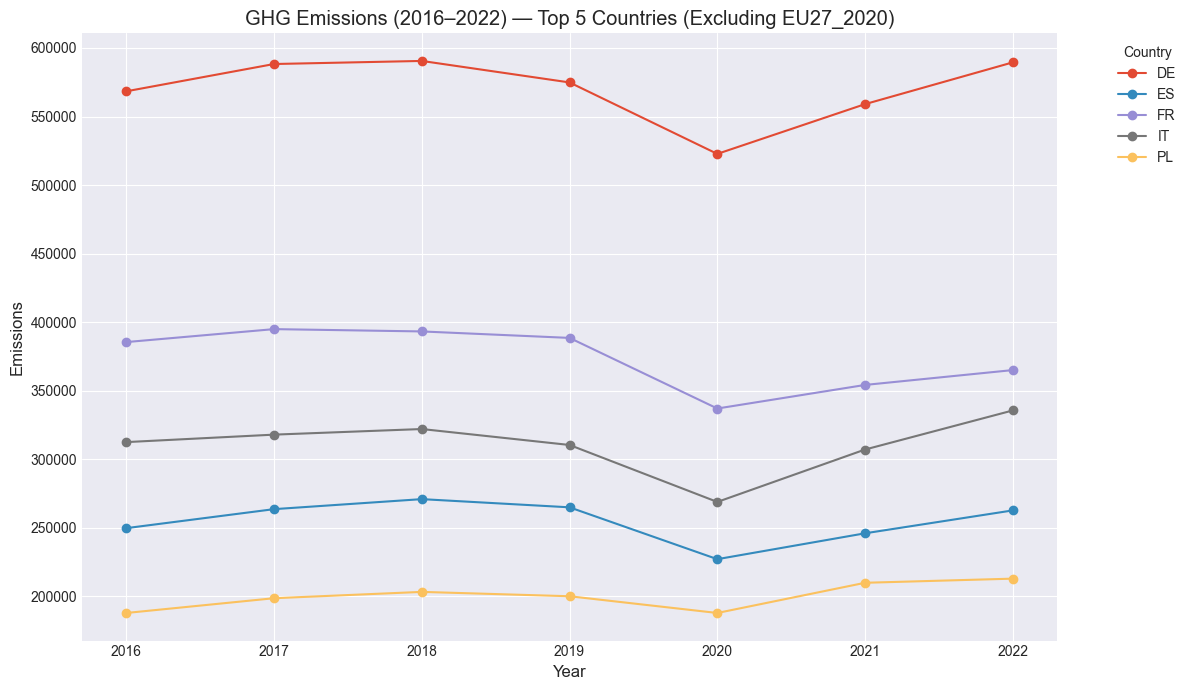

In [32]:
df_top5 = df_filtered[df_filtered['country'].isin(top5_countries)]


df_plot = df_top5.pivot_table(
    index='Year',
    columns='country',
    values='Emissions',
    aggfunc='sum'
).sort_index()




plt.style.use('seaborn-v0_8-darkgrid')
df_plot.plot(
    kind='line',
    marker='o',
    figsize=(12,7),
    title='GHG Emissions (2016–2022) — Top 5 Countries (Excluding EU27_2020)'
)
plt.ylabel('Emissions')
plt.xlabel('Year')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()